# Rashba coupling

Construct a one-dimensional Hubbard model with the following non-interacting Hamiltonian, here expressed in $k$-space:
$$
    H_0 = \sum_k \mathcal{H}_k  ~~~~~ \mathcal{H}_k = -2t\cos k\;c^\dagger_k c_k - 2m \sin k\;c^\dagger_k \sigma_x c_k
$$
where $c_k$ is a two-component annihilation operator in spin space : $(c_{k,\uparrow}, c_{k,\downarrow})$ and $\sigma_x$ is a Pauli matrix.
Plot the non-interacting $\left(U=0\right)$ dispersion of this model as a function of $k$ in the interval $[-\pi,\pi]$ for $t=1$ and $m=0.2$ and check that it agrees with your analytical computation.

In [1]:
from pyqcm import *
from pyqcm.spectral import *

import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 125

Number of openMP threads = 4


In [2]:
# Defining a simple 4 site 1D lattice model
new_cluster_model('L4', 4, 0)
add_cluster('L4', [0, 0, 0], [[0, 0, 0], [1, 0, 0], [2, 0, 0], [3, 0, 0]])
lattice_model('1D_L4', [[4, 0, 0]])

In [3]:
# Typical Hubbard model operators
# interaction_operator("U")
hopping_operator("t", [1,0,0], -1)

# Defining the one-body Rashba coupling term
hopping_operator("m", [1,0,0], -1, tau=2, sigma=1) # tau=2 ---> imaginary contribution ensures sin(k), sigma=1 ---> Ensures spin flip

In [4]:
set_target_sectors(["R0:N4"]) # IMPORTANT : Spin isn't conserved due to spin-flipping in the Rashba term

# Simple parameter set
set_parameters("""
    t=1
    m=0.2
""")

[('t', 1.0), ('m', 0.2)]

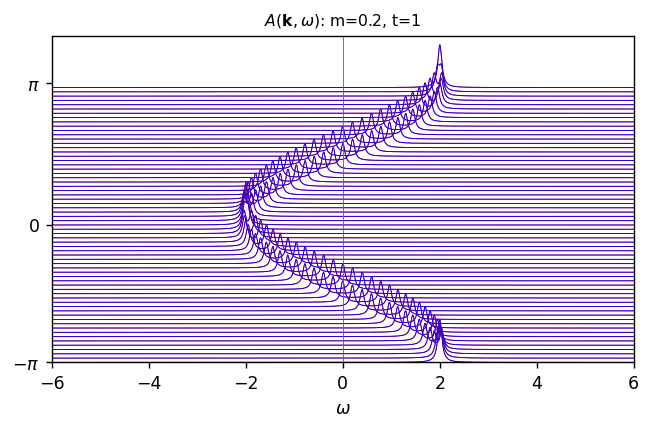

In [5]:
# Plotting the spectral function
new_model_instance()
spectral_function(path="line", band=1)

### Interpretation

As we can see, the addition of the Rashba coupling term to the kinetic hamilonian creates two energy levels instead of one.

### "Manual" energy eigenvalues

First, consider the following definition for the hamiltonian with Rashba coupling:
$$
    H_0 = \sum_{k}\mathcal{H}_k ~~,~~ \mathcal{H}_k = -2t\operatorname{cos}(k)c_k^\dagger c_k -2t\operatorname{sin}(k)c_k^\dagger\sigma_x c_k~~,~~ 
    c_k\equiv \begin{pmatrix}
        c_{k\uparrow} \\
        c_{k\downarrow}
    \end{pmatrix} \Rightarrow 
    c_k^\dagger = \begin{pmatrix}
        c_{k\uparrow}^\dagger &
        c_{k\downarrow}^\dagger
    \end{pmatrix}
$$
With these definitions, 
$$
    \mathcal{H}_k = -2t\operatorname{cos}(k)\left[ c_{k\uparrow}^\dagger c_{k\uparrow} + c_{k\downarrow}^\dagger c_{k\downarrow} \right] -2t\operatorname{sin}(k)\left[ c_{k\uparrow}^\dagger c_{k\downarrow} + c_{k\downarrow}^\dagger c_{k\uparrow} \right]
$$
Or more interestingly,
$$
    \mathcal{H}_k = c_k^\dagger
    \underbrace{\begin{pmatrix}
        -2t\operatorname{cos}(k) & -2m\operatorname{sin}(k) \\
        -2m\operatorname{sin}(k) & -2t\operatorname{cos}(k) 
    \end{pmatrix}}_{M}
    c_k
$$
Finding the eigenvalues of $M$ yields:
$$
    \varepsilon(k) = -2t\operatorname{cos}(k) \pm 2m\operatorname{sin}(k) = 2\left[ -t\operatorname{cos}(k) \pm m\operatorname{sin}(k) \right]
$$
Plotting these should yield the same result as the numerical computations above.


In [6]:
# creating a grid of wavevectors in the Brillouin zone
k_grid = np.linspace(-np.pi, np.pi, 150)

t=1 # value of the hopping operator
m=0.2 # value of the coupling term


# Defining the energy eigenvalues found by hand
def eig_1(k, t, m):
    return -2*(t*np.cos(k) + m*np.sin(k))

def eig_2(k, t, m):
    return -2*(t*np.cos(k) - m*np.sin(k))

/tmp/ipykernel_4200/336530902.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


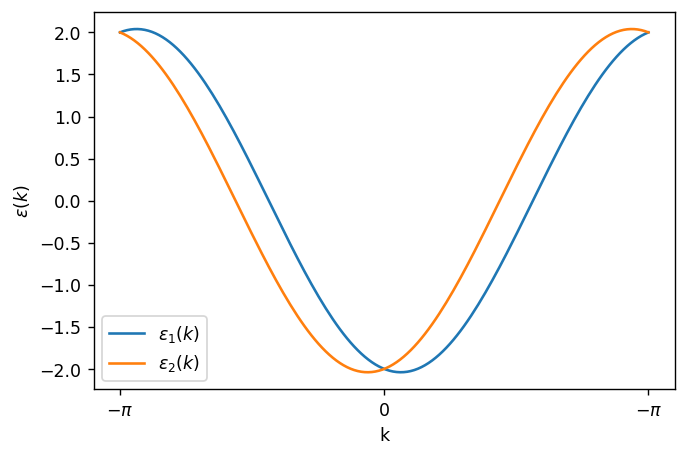

In [7]:
# Plotting the analytic dispersion curve
fig, ax = plt.subplots()

ax.plot(k_grid, eig_1(k_grid, t, m), label="$\epsilon_1(k)$")
ax.plot(k_grid, eig_2(k_grid, t, m), label="$\epsilon_2(k)$")

ax.set_xlabel("k")
ax.set_ylabel("$\epsilon(k)$")

ax.set_xticks((-np.pi,0,np.pi))
ax.set_xticklabels(("$-\pi$","$0$","$-\pi$"))

ax.legend()

fig.show()

### As expected, this result is identical to the one obtained numerically.